# Churn model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('sub_churn_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132237 entries, 0 to 132236
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    132237 non-null  int64  
 1   subid                         132237 non-null  int64  
 2   package_type                  123064 non-null  object 
 3   num_weekly_services_utilized  66607 non-null   float64
 4   preferred_genre               122790 non-null  object 
 5   intended_use                  130929 non-null  object 
 6   weekly_consumption_hour       106667 non-null  float64
 7   num_ideal_streaming_services  65954 non-null   float64
 8   age                           107770 non-null  float64
 9   male_TF                       132080 non-null  object 
 10  country                       132237 non-null  object 
 11  attribution_technical         132237 non-null  object 
 12  attribution_survey            131152 non-nul

In [3]:
# drop variables
drop_columns = ['Unnamed: 0', 'trial_end_date','account_creation_date','subid','months_per_bill_period','language','country','current_sub_TF', 'payment_period','last_payment','next_payment','cancel_date','discount_rate','num_end_create','user_label','monthly_price']
df2 = df.drop(columns = drop_columns, axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132237 entries, 0 to 132236
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  123064 non-null  object 
 1   num_weekly_services_utilized  66607 non-null   float64
 2   preferred_genre               122790 non-null  object 
 3   intended_use                  130929 non-null  object 
 4   weekly_consumption_hour       106667 non-null  float64
 5   num_ideal_streaming_services  65954 non-null   float64
 6   age                           107770 non-null  float64
 7   male_TF                       132080 non-null  object 
 8   attribution_technical         132237 non-null  object 
 9   attribution_survey            131152 non-null  object 
 10  op_sys                        125718 non-null  object 
 11  plan_type                     132237 non-null  object 
 12  discount_price                132237 non-nul

In [4]:
# checking missing values
df2.isnull().sum()

package_type                     9173
num_weekly_services_utilized    65630
preferred_genre                  9447
intended_use                     1308
weekly_consumption_hour         25570
num_ideal_streaming_services    66283
age                             24467
male_TF                           157
attribution_technical               0
attribution_survey               1085
op_sys                           6519
plan_type                           0
discount_price                      0
initial_credit_card_declined        0
join_fee                        24311
payment_type                    78044
num_trial_days                      0
trial_completed                     0
churn_TF                            0
dtype: int64

In [5]:
df2.to_csv('churn_model.csv')
df2.head()

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,op_sys,plan_type,discount_price,initial_credit_card_declined,join_fee,payment_type,num_trial_days,trial_completed,churn_TF
0,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,facebook,Android,base_uae_14_day_trial,4.5141,False,NaN,Standard Charter,14,True,0.0
1,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,facebook,facebook,NaN,base_uae_14_day_trial,4.5141,False,0.3303,NaN,14,True,0.0
2,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,youtube,iOS,base_uae_14_day_trial,4.5141,False,0.0367,NaN,14,True,0.0
3,base,NaN,comedy,access to exclusive content,20.051667,NaN,70.0,False,bing,tv,NaN,base_uae_14_day_trial,4.5141,False,0.3303,RAKBANK,14,True,0.0
4,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,bing,search,Android,base_uae_14_day_trial,4.5141,False,0.3303,Standard Charter,14,True,0.0


In [6]:
df2.describe()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,discount_price,join_fee,num_trial_days,churn_TF
count,66607.000000,106667.000000,65954.000000,1.077700e+05,132237.000000,107926.000000,132237.000000,132237.000000
mean,3.215248,28.443109,2.091412,1.991602e+02,4.512549,0.115164,13.990472,0.081951
std,0.870456,4.957537,0.293978,2.619921e+04,0.092917,0.176983,0.365112,0.274292
min,0.000000,-32.146760,0.000000,0.000000e+00,0.770700,-0.660600,0.000000,0.000000
25%,3.000000,25.851492,2.000000,3.300000e+01,4.514100,0.036700,14.000000,0.000000
50%,3.000000,27.301448,2.000000,4.300000e+01,4.514100,0.036700,14.000000,0.000000
75%,4.000000,31.651317,2.000000,5.300000e+01,4.514100,0.110100,14.000000,0.000000
max,14.000000,76.599962,7.000000,8.061990e+06,5.027900,0.734000,14.000000,1.000000


# Exploratory data analysis

In [7]:
import seaborn as sns

In [8]:
cate_col = ['package_type','preferred_genre','intended_use','male_TF','attribution_technical','attribution_survey','op_sys','plan_type','payment_type','trial_completed','initial_credit_card_declined']

C:\Users\21024\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\21024\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\21024\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\21024\anaconda3\lib\si

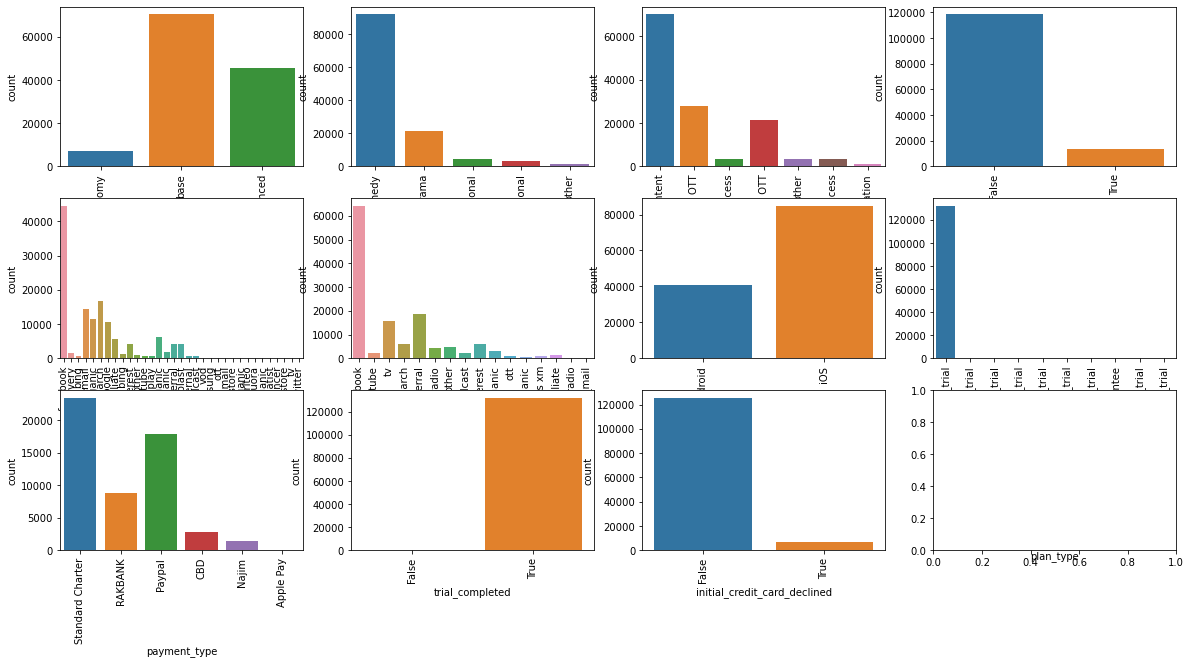

In [9]:
fig, ax = plt.subplots(3, 4, figsize = (20,10))
for i, subplot in zip(cate_col, ax.flatten()):
    # x = i, hue = hue, kind = 'count', data = df, alpha = 0.7, height= 4, aspect= 1.5
    sns.countplot(df2[i], ax = subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


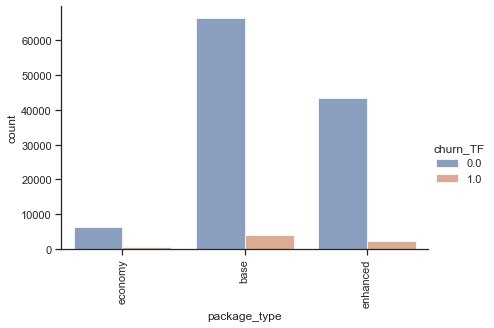

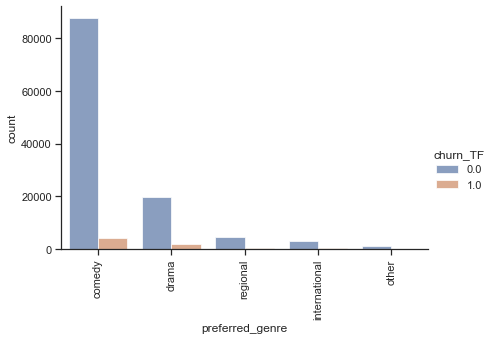

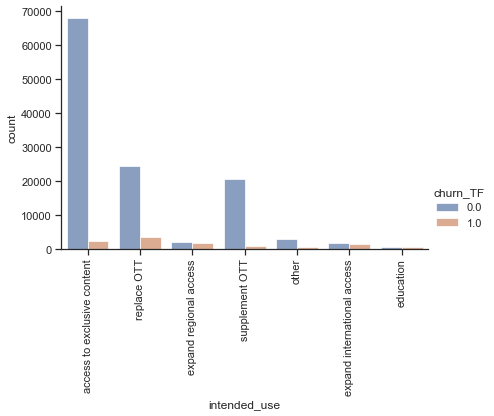

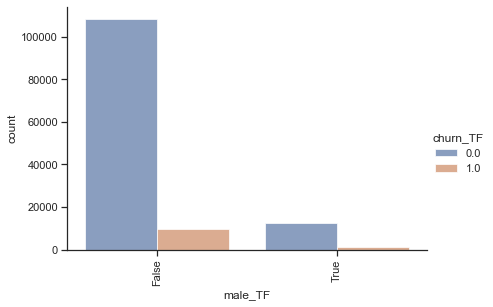

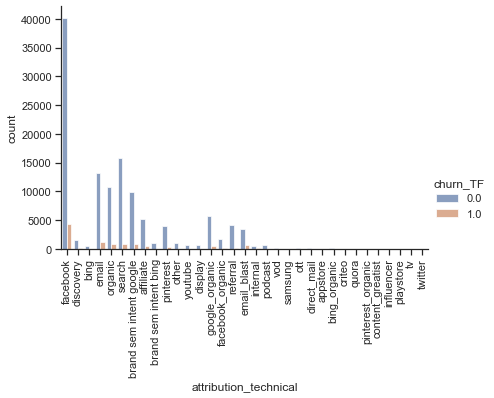

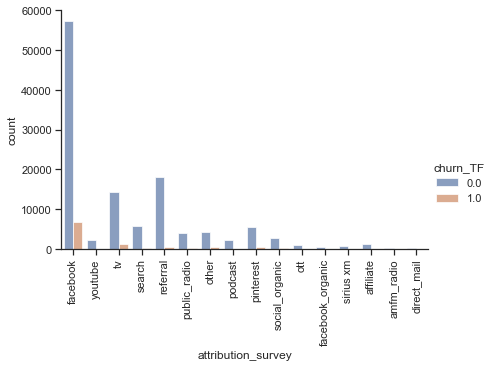

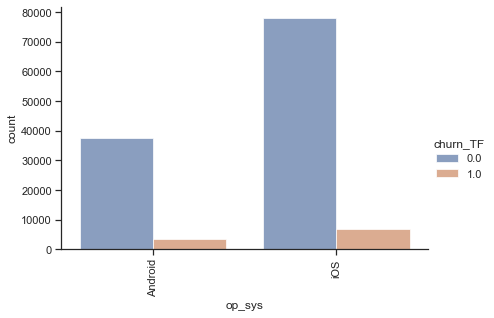

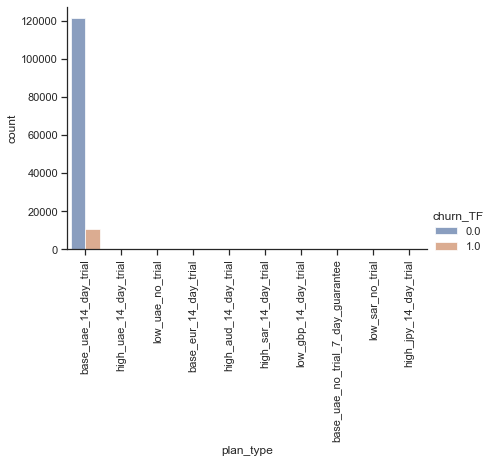

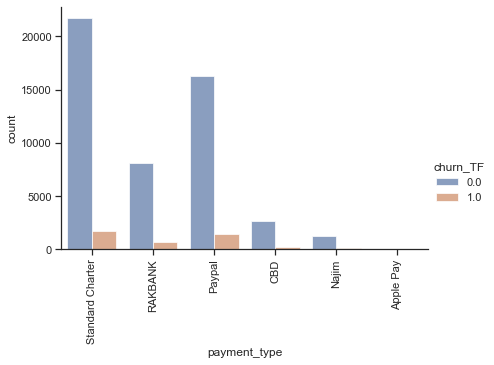

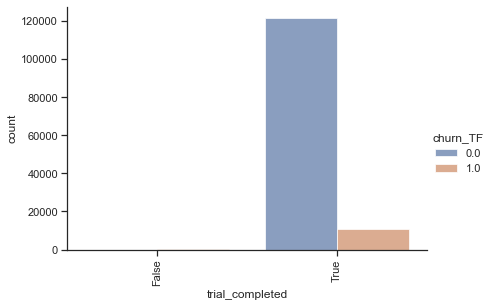

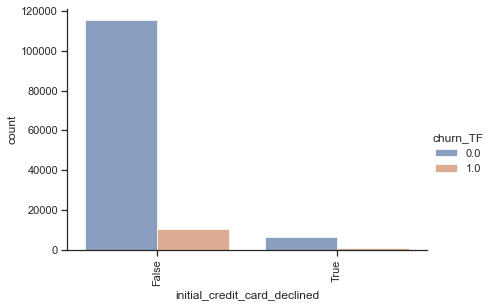

In [10]:
def draw_hist_plot(df, cate_col, hue = 'churn_TF'):
    sns.set_theme(style="ticks")
    for i in cate_col:
        g = sns.catplot(x = i, hue = hue, kind = 'count', data = df, alpha = 0.7, height= 4, aspect= 1.5)
        g.set_xticklabels(rotation= 90)
draw_hist_plot(df = df2, cate_col = cate_col, hue = 'churn_TF')

# Feature preprocessing

## Categorical features engineering

In [11]:
def cate_groupby(df, cate_col, cla = 'churn_TF'):
    for i in cate_col:
        print('Group by %s' % i)
        print(df.groupby([i, cla]).size())
        print(df.groupby(i)[cla].value_counts(normalize=True).mul(100))
        print('-'*50)
cate_groupby(df = df2, cate_col = cate_col, cla = 'churn_TF')

Group by package_type
package_type  churn_TF
base          0.0         66480
              1.0          4015
economy       0.0          6329
              1.0           649
enhanced      0.0         43426
              1.0          2165
dtype: int64
package_type  churn_TF
base          0.0         94.304561
              1.0          5.695439
economy       0.0         90.699341
              1.0          9.300659
enhanced      0.0         95.251256
              1.0          4.748744
Name: churn_TF, dtype: float64
--------------------------------------------------
Group by preferred_genre
preferred_genre  churn_TF
comedy           0.0         87687
                 1.0          4243
drama            0.0         19732
                 1.0          1829
international    0.0          3112
                 1.0           242
other            0.0          1036
                 1.0           144
regional         0.0          4390
                 1.0           375
dtype: int64
preferred_genre

In [12]:
# drop attribution_technical & attribution_survey
df3 = df2.drop(columns = ['attribution_technical', 'attribution_survey'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132237 entries, 0 to 132236
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  123064 non-null  object 
 1   num_weekly_services_utilized  66607 non-null   float64
 2   preferred_genre               122790 non-null  object 
 3   intended_use                  130929 non-null  object 
 4   weekly_consumption_hour       106667 non-null  float64
 5   num_ideal_streaming_services  65954 non-null   float64
 6   age                           107770 non-null  float64
 7   male_TF                       132080 non-null  object 
 8   op_sys                        125718 non-null  object 
 9   plan_type                     132237 non-null  object 
 10  discount_price                132237 non-null  float64
 11  initial_credit_card_declined  132237 non-null  bool   
 12  join_fee                      107926 non-nul

In [13]:
# if plan_type = 'base_uae_14_day_trial', we set True
df3['plan_type_f'] = df3.plan_type == 'base_uae_14_day_trial'


In [14]:
df4 = df3.drop(columns = 'plan_type')

In [15]:
df.num_trial_days.unique()

array([14,  0], dtype=int64)

In [16]:
# encoding num_trial_days
df4['14_trial_days'] = df4.num_trial_days == 14
print(df4.groupby(['14_trial_days', 'churn_TF']).size())
print(df4.groupby('14_trial_days')['churn_TF'].value_counts(normalize=True).mul(100))

14_trial_days  churn_TF
False          0.0             46
               1.0             44
True           0.0         121354
               1.0          10793
dtype: int64
14_trial_days  churn_TF
False          0.0         51.111111
               1.0         48.888889
True           0.0         91.832580
               1.0          8.167420
Name: churn_TF, dtype: float64


In [41]:
df5 = df4.drop(columns = ['num_trial_days', 'payment_type'])

In [42]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132237 entries, 0 to 132236
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  123064 non-null  object 
 1   num_weekly_services_utilized  66607 non-null   float64
 2   preferred_genre               122790 non-null  object 
 3   intended_use                  130929 non-null  object 
 4   weekly_consumption_hour       106667 non-null  float64
 5   num_ideal_streaming_services  65954 non-null   float64
 6   age                           107770 non-null  float64
 7   male_TF                       132080 non-null  object 
 8   op_sys                        125718 non-null  object 
 9   discount_price                132237 non-null  float64
 10  initial_credit_card_declined  132237 non-null  bool   
 11  join_fee                      107926 non-null  float64
 12  trial_completed               132237 non-nul

## Handle with numerical features

In [43]:
numerical_col = ['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','age','discount_price','join_fee']

array([[<AxesSubplot:title={'center':'num_weekly_services_utilized'}>,
        <AxesSubplot:title={'center':'weekly_consumption_hour'}>,
        <AxesSubplot:title={'center':'num_ideal_streaming_services'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'discount_price'}>,
        <AxesSubplot:title={'center':'join_fee'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

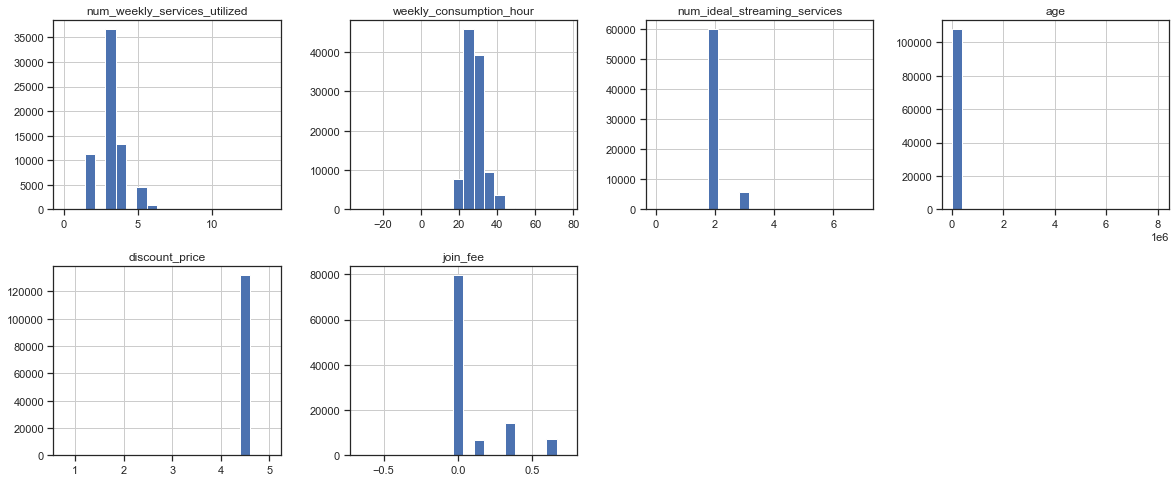

In [44]:
df5[numerical_col].hist(bins = 20, figsize = (20,8), layout = (2,4))

In [45]:
df5[numerical_col] = df5[numerical_col].astype(float)

In [46]:
print(sum(df5.age < 0))
print(df5.age.min())
print(df5.age.max())

0
0.0
8061990.0


In [50]:
#  SHARE. A person who has reached the age of 20 is deemed to be an adult 
# remove rows with age < 20 and age > 100
df6 = df5[(df5.age >= 20) & (df5.age <=  100)]
df6.age.describe()

count    105840.000000
mean         43.648443
std          13.254026
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          89.000000
Name: age, dtype: float64

In [67]:
# change values of rows with join_fee < 0 and num_ideal_streaming_services <0,let them be 0
# df.loc[df['First Season'] > 1990, 'First Season'] = 1
df7 = df6.copy()
df7.loc[df7['join_fee'] <0, 'join_fee'] = 0
df7.loc[df7['num_ideal_streaming_services'] <0, 'num_ideal_streaming_services'] = 0

In [68]:
df7.isna().sum()

package_type                     9007
num_weekly_services_utilized    40226
preferred_genre                  9277
intended_use                     1277
weekly_consumption_hour          1090
num_ideal_streaming_services    40870
age                                 0
male_TF                             1
op_sys                           6266
discount_price                      0
initial_credit_card_declined        0
join_fee                            0
trial_completed                     0
churn_TF                            0
plan_type_f                         0
14_trial_days                       0
dtype: int64

In [70]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105840 entries, 1 to 132235
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   package_type                  96833 non-null   object 
 1   num_weekly_services_utilized  65614 non-null   float64
 2   preferred_genre               96563 non-null   object 
 3   intended_use                  104563 non-null  object 
 4   weekly_consumption_hour       104750 non-null  float64
 5   num_ideal_streaming_services  64970 non-null   float64
 6   age                           105840 non-null  float64
 7   male_TF                       105839 non-null  object 
 8   op_sys                        99574 non-null   object 
 9   discount_price                105840 non-null  float64
 10  initial_credit_card_declined  105840 non-null  bool   
 11  join_fee                      105840 non-null  float64
 12  trial_completed               105840 non-nul

In [ ]:
# fill NA with the median numerical_data

In [77]:
df8 = df7.copy()
df8 = df8.fillna(df8.median())
df8.describe()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,discount_price,join_fee,churn_TF
count,105840.000000,105840.000000,105840.000000,105840.000000,105840.00000,105840.000000,105840.000000
mean,3.136206,28.439276,2.056406,43.648443,4.51216,0.115869,0.088171
std,0.693527,4.932325,0.235006,13.254026,0.10384,0.177611,0.283545
min,0.000000,-32.146760,0.000000,20.000000,0.77070,0.000000,0.000000
25%,3.000000,25.851492,2.000000,33.000000,4.51410,0.036700,0.000000
50%,3.000000,27.301448,2.000000,43.000000,4.51410,0.036700,0.000000
75%,3.000000,31.651317,2.000000,53.000000,4.51410,0.110100,0.000000
max,14.000000,76.599962,7.000000,89.000000,5.02790,0.734000,1.000000


In [78]:
df8.isna().sum()

package_type                    9007
num_weekly_services_utilized       0
preferred_genre                 9277
intended_use                    1277
weekly_consumption_hour            0
num_ideal_streaming_services       0
age                                0
male_TF                            0
op_sys                          6266
discount_price                     0
initial_credit_card_declined       0
join_fee                           0
trial_completed                    0
churn_TF                           0
plan_type_f                        0
14_trial_days                      0
dtype: int64

In [89]:
# deal with missing values of categorical variables 
df9 = df8
df9 = df9.dropna()
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90468 entries, 2 to 132235
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   package_type                  90468 non-null  object 
 1   num_weekly_services_utilized  90468 non-null  float64
 2   preferred_genre               90468 non-null  object 
 3   intended_use                  90468 non-null  object 
 4   weekly_consumption_hour       90468 non-null  float64
 5   num_ideal_streaming_services  90468 non-null  float64
 6   age                           90468 non-null  float64
 7   male_TF                       90468 non-null  object 
 8   op_sys                        90468 non-null  object 
 9   discount_price                90468 non-null  float64
 10  initial_credit_card_declined  90468 non-null  bool   
 11  join_fee                      90468 non-null  float64
 12  trial_completed               90468 non-null  bool   
 13  

## convert categorical features to numerical features

In [93]:
df10 = df9.copy()
categorylist = ['package_type', 'preferred_genre','intended_use','op_sys']
dum_df = pd.get_dummies(df10, columns=categorylist)
dum_df.head()

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,discount_price,initial_credit_card_declined,join_fee,trial_completed,churn_TF,...,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,op_sys_Android,op_sys_iOS
2,4.0,22.951579,3.0,28.0,False,4.5141,False,0.0367,True,0.0,...,0,0,0,0,0,0,1,0,0,1
4,2.0,20.051667,2.0,61.0,False,4.5141,False,0.3303,True,0.0,...,0,1,0,0,0,0,0,0,1,0
5,3.0,34.551230,2.0,23.0,False,4.5141,False,0.0000,True,0.0,...,0,1,0,0,0,0,0,0,0,1
6,3.0,25.851492,2.0,73.0,False,4.5141,False,0.6606,True,0.0,...,0,1,0,0,0,0,0,0,0,1
8,3.0,37.451142,2.0,24.0,True,4.5141,False,0.3303,True,0.0,...,0,1,0,0,0,0,0,0,0,1


In [100]:
dum_df['male_TF'] = dum_df['male_TF'].astype('bool')
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90468 entries, 2 to 132235
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   num_weekly_services_utilized              90468 non-null  float64
 1   weekly_consumption_hour                   90468 non-null  float64
 2   num_ideal_streaming_services              90468 non-null  float64
 3   age                                       90468 non-null  float64
 4   male_TF                                   90468 non-null  bool   
 5   discount_price                            90468 non-null  float64
 6   initial_credit_card_declined              90468 non-null  bool   
 7   join_fee                                  90468 non-null  float64
 8   trial_completed                           90468 non-null  bool   
 9   churn_TF                                  90468 non-null  float64
 10  plan_type_f                      

In [108]:
# separate our data into a target feature and predicting features
x = dum_df.drop('churn_TF', axis=1)
y = dum_df['churn_TF']

# Scale Data

In [109]:
# data normalization to make models converge faster
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
x_scaled = minmaxscaler.fit_transform(x)  # apply min_max scale


# Modeling

## logistic regression model

In [113]:
# Define a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_scaled, y)


C:\Users\21024\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
y_hat = logreg.predict(x_scaled)

In [115]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y, y_hat)

In [116]:
cnf_matrix

array([[85330,   167],
       [ 4736,   235]], dtype=int64)

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     85497
         1.0       0.58      0.05      0.09      4971

    accuracy                           0.95     90468
   macro avg       0.77      0.52      0.53     90468
weighted avg       0.93      0.95      0.92     90468



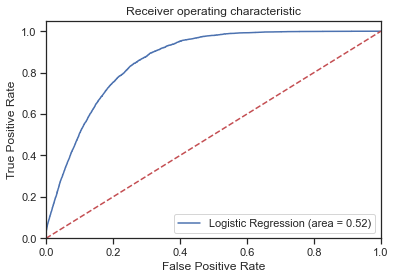

In [124]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, logreg.predict(x_scaled))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(x_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Decision tree model

In [147]:
from sklearn import tree
# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier(max_depth= 5)
# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(x_scaled, y)

In [148]:
from sklearn.model_selection import  cross_val_score
# 10 Folds Cross Validation 
clf_score = cross_val_score(classification_tree, x_scaled, y, cv=10)
print(clf_score)
clf_score.mean()

[0.9468332  0.94716481 0.9465016  0.94694374 0.94661214 0.94694374
 0.94639107 0.94639107 0.94638514 0.94693787]


0.9467104379685608

C:\Users\21024\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


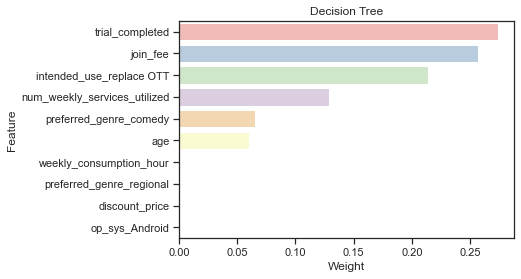

In [149]:
Rfclf_fea = pd.DataFrame(classification_tree.feature_importances_)
Rfclf_fea["Feature"] = list(x) 
Rfclf_fea.sort_values(by=0, ascending=False).head()
g = sns.barplot(0,"Feature",data = Rfclf_fea.sort_values(by=0, ascending=False)[0:10], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Decision Tree")

## Important features are trial_completed, join_fee, intended_use_replace OTT, num_weekly_services_utilized, preferred_genre_comedy, and age

In [150]:
 # Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
y_pred = classification_tree.predict(x_scaled)
probs = classification_tree.predict_proba(x_scaled)
print(confusion_matrix(y, y_pred))
# calculate AUC
auc = roc_auc_score(y, probs[:,1])
print('AUC: %.3f' % auc)
print(y.shape)
print(probs.shape)

[[85497     0]
 [ 4821   150]]
AUC: 0.818
(90468,)
(90468, 2)


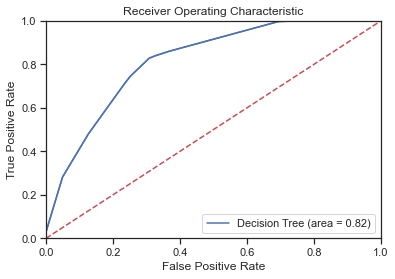

In [151]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate the fpr and tpr for all thresholds of the classification
dt_roc_auc = roc_auc_score(y, probs[:,1])
fpr, tpr, threshold = roc_curve(y, probs[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.savefig('dt_ROC')
plt.show()


# Conclusion
The AUC value of the decision tree model is much better than that of the logistic regression model

In [152]:
probs[:,1]

array([0.03552279, 0.00088731, 0.11072961, ..., 0.00011422, 0.00271739,
       0.02376952])

In [154]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90468 entries, 2 to 132235
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   package_type                  90468 non-null  object 
 1   num_weekly_services_utilized  90468 non-null  float64
 2   preferred_genre               90468 non-null  object 
 3   intended_use                  90468 non-null  object 
 4   weekly_consumption_hour       90468 non-null  float64
 5   num_ideal_streaming_services  90468 non-null  float64
 6   age                           90468 non-null  float64
 7   male_TF                       90468 non-null  object 
 8   op_sys                        90468 non-null  object 
 9   discount_price                90468 non-null  float64
 10  initial_credit_card_declined  90468 non-null  bool   
 11  join_fee                      90468 non-null  float64
 12  trial_completed               90468 non-null  bool   
 13  

In [157]:
df10['churn_pred'] = probs[:,1]
df10.churn_pred.describe()

count    90468.000000
mean         0.054948
std          0.073573
min          0.000000
25%          0.002717
50%          0.023770
75%          0.110730
max          1.000000
Name: churn_pred, dtype: float64

In [159]:
df10.churn_TF.describe()

count    90468.000000
mean         0.054948
std          0.227879
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn_TF, dtype: float64

In [160]:
sum(df10.churn_TF)

4971.0

In [161]:
10837/(121400+10837)

0.08195134493371749

In [162]:
4971/90468

0.05494760578326038

In [163]:
df10.to_csv('churn_model_final.csv')

# Apply model result
- I did this by using excel, please see the attached file.
I built a decision tree model to predict customer churn. The model's accuracy is 94.67% 
Applying prediction results under the acceptance rate 25%, threshold 10%, discount 10%, base price 18.06 AED (4 month bill), we will get 0.30% projected lift in revenue.
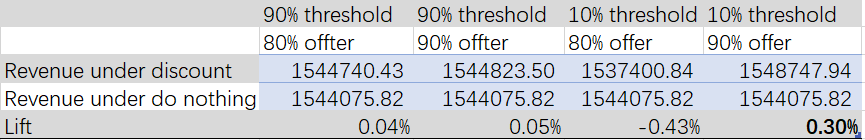